In [21]:
# ANN to predict Cardiovascular disease
import csv
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (12, 8)

# dataset input and output
dataset = pd.read_csv("Cardiovascular_Disease.csv", delimiter = ';')
dataset_len = dataset.shape[0]
dataset

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [22]:
# dataset manipulation

# id is a unique feature and not related to cardiovascular diseases. Delete "id" attribute
del dataset["id"]

# attribute "age" is in days. Convert to years (1 year = 365 days)
dataset["age"] /= 365

dataset = dataset.sample(frac = .0286).sort_index().copy()
dataset

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
103,49.665753,2,183,95.0,125,80,1,3,1,0,1,0
112,45.569863,1,158,78.0,110,70,1,1,0,0,1,0
130,60.238356,2,169,59.0,130,80,1,1,0,0,0,1
147,64.301370,2,166,69.0,130,90,2,1,0,0,1,1
189,39.882192,2,182,75.0,120,80,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69695,59.506849,1,168,60.0,120,80,1,1,0,0,1,1
69732,41.876712,1,151,71.0,160,100,1,1,0,0,1,0
69872,59.747945,1,152,56.0,160,1000,1,1,0,0,1,1
69919,47.430137,1,159,45.0,110,70,2,2,0,0,1,0


In [23]:
# dataset summary
dataset.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000
mean,53.341991,1.355644,164.640360,74.820480,126.584416,92.123876,1.363636,1.217782,0.084416,0.059441,0.810190,0.500999
std,6.740231,0.478828,8.651076,14.685139,17.976527,100.489301,0.677795,0.563351,0.278080,0.236506,0.392249,0.500124
min,39.265753,1.000000,59.000000,40.000000,12.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.480822,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.910959,1.000000,165.000000,73.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,58.450685,2.000000,170.000000,83.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.934247,2.000000,198.000000,170.000000,210.000000,1125.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
# dataset summary
dataset.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000,2002.000000
mean,53.341991,1.355644,164.640360,74.820480,126.584416,92.123876,1.363636,1.217782,0.084416,0.059441,0.810190,0.500999
std,6.740231,0.478828,8.651076,14.685139,17.976527,100.489301,0.677795,0.563351,0.278080,0.236506,0.392249,0.500124
min,39.265753,1.000000,59.000000,40.000000,12.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.480822,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.910959,1.000000,165.000000,73.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,58.450685,2.000000,170.000000,83.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.934247,2.000000,198.000000,170.000000,210.000000,1125.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
# extraction of input and output from dataset for easy calculation
# "Outcome" = output column
# all other columns are input columns

dataset_columns = dataset.columns.values.tolist()
dataset_columns_number = len(dataset_columns)
input_columns  = dataset_columns[: dataset_columns_number - 1] 
output_columns = dataset_columns[  dataset_columns_number - 1 :]

input_columns, output_columns

(['age',
  'gender',
  'height',
  'weight',
  'ap_hi',
  'ap_lo',
  'cholesterol',
  'gluc',
  'smoke',
  'alco',
  'active'],
 ['cardio'])

In [26]:
# build input matrix
real_input  = dataset[input_columns].copy()
real_input

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
103,49.665753,2,183,95.0,125,80,1,3,1,0,1
112,45.569863,1,158,78.0,110,70,1,1,0,0,1
130,60.238356,2,169,59.0,130,80,1,1,0,0,0
147,64.301370,2,166,69.0,130,90,2,1,0,0,1
189,39.882192,2,182,75.0,120,80,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
69695,59.506849,1,168,60.0,120,80,1,1,0,0,1
69732,41.876712,1,151,71.0,160,100,1,1,0,0,1
69872,59.747945,1,152,56.0,160,1000,1,1,0,0,1
69919,47.430137,1,159,45.0,110,70,2,2,0,0,1


In [27]:
# build output matrix
real_output = dataset[output_columns].copy() 
real_output

,cardio
103,0
112,0
130,1
147,1
189,0
...,...
69695,1
69732,0
69872,1
69919,0


In [28]:
# outlier detection, data normalization for next several sessions. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x07CCECD0>,
      dtype=object)

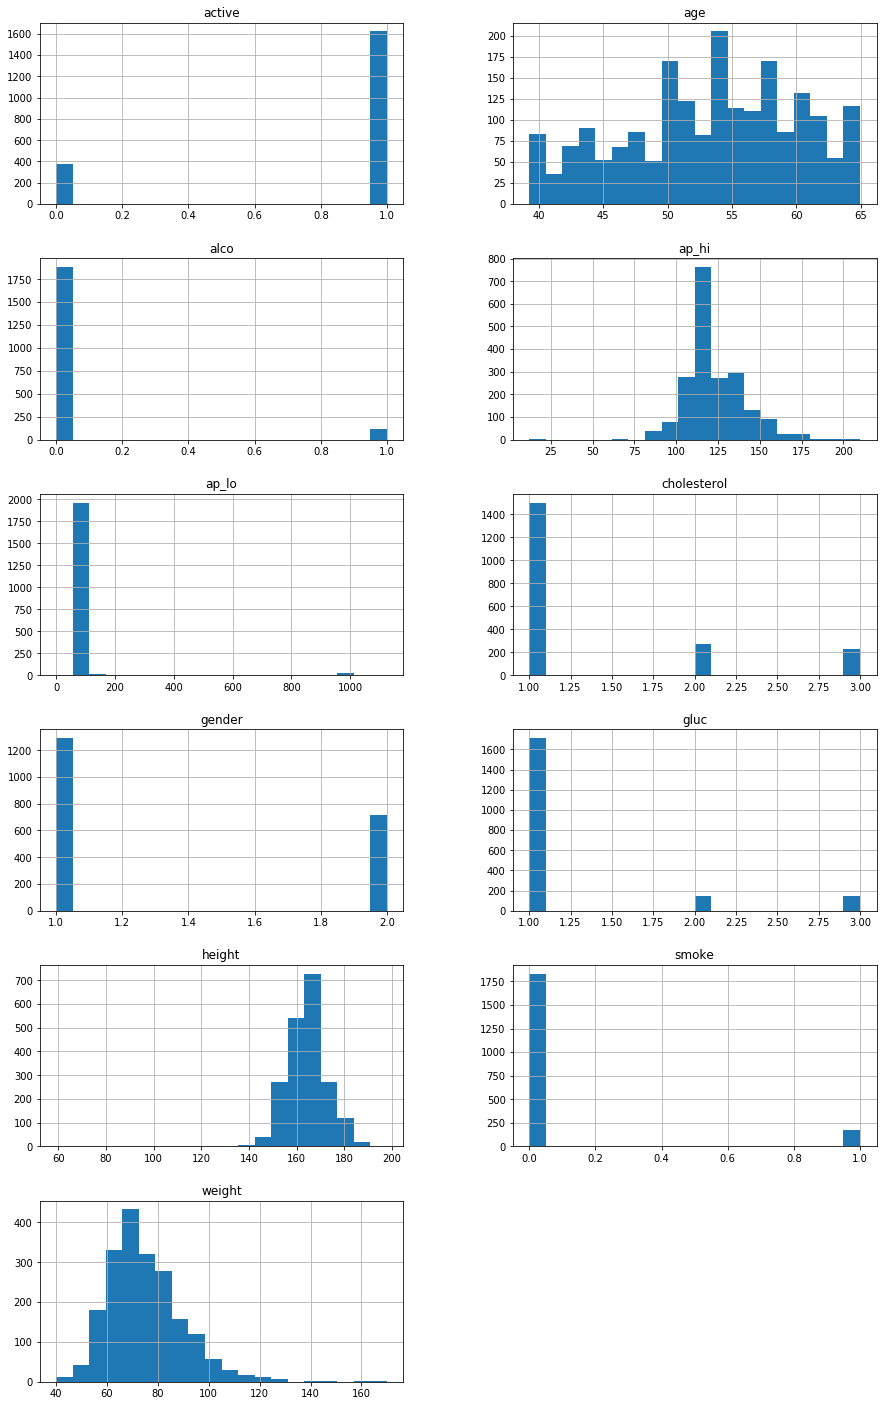

In [29]:
# histogram (data vs frequency)
real_input.hist(figsize  = (15, 25), layout = ((real_input.columns.size+1)//2, 2), bins = 20)

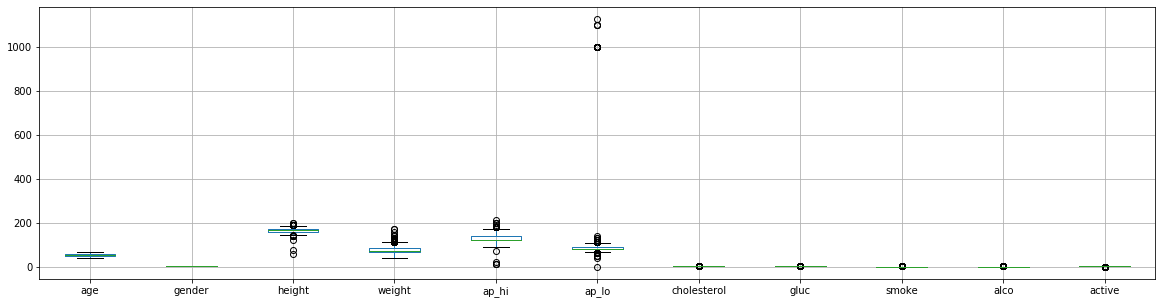

In [30]:
# boxplot.
# boxplot will tell us about outlier data and many more but to know about outlier data 
# boxplot is great.
# to know more about boxplot please visit the link below - 
# https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51
real_input.boxplot(figsize = (20, 5))

In [31]:
features = real_input.columns.values.tolist()
features

['age',
 'gender',
 'height',
 'weight',
 'ap_hi',
 'ap_lo',
 'cholesterol',
 'gluc',
 'smoke',
 'alco',
 'active']

In [32]:
# outlier detection

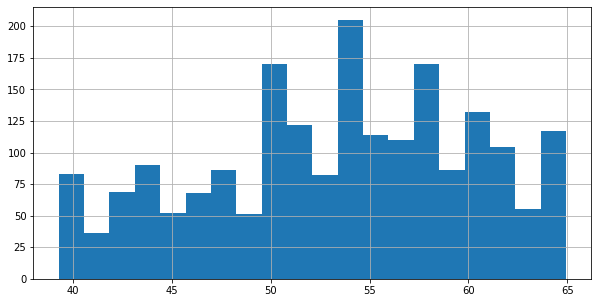

In [33]:
j = 0 
feature = features[j]
real_input[feature].hist(figsize = (10, 5), bins = 20)

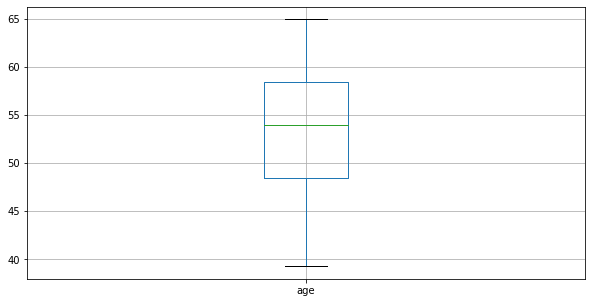

In [34]:
real_input.boxplot(column = feature, figsize = (10, 5))

In [35]:
'''
For feature "age",
outliers found in both histogram and boxplot
Set "age" < 38 = 38
'''

real_input[feature] = real_input[feature].mask(real_input[feature] < 38., other = 38.)

In [36]:
print("feature", feature, "details =")
real_input[feature].describe()

feature age details =


count    2002.000000
mean       53.341991
std         6.740231
min        39.265753
25%        48.480822
50%        53.910959
75%        58.450685
max        64.934247
Name: age, dtype: float64

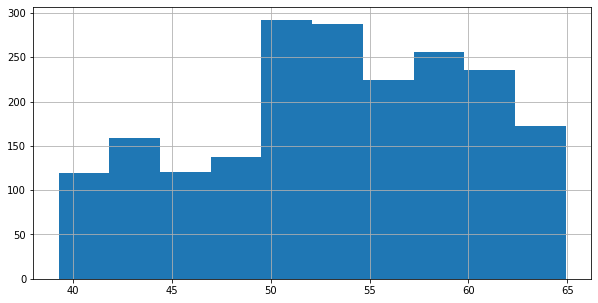

In [37]:
'''
Feature "age" is now well distributed
'''
real_input[feature].hist(figsize = (10, 5), bins = 10)

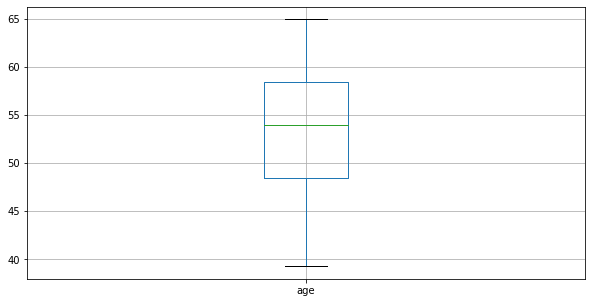

In [38]:
real_input.boxplot(column = feature, figsize = (10, 5))

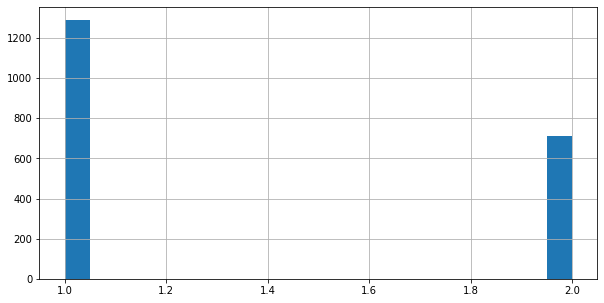

In [39]:
j += 1
feature = features[j]
real_input[feature].hist(figsize = (10, 5), bins = 20)

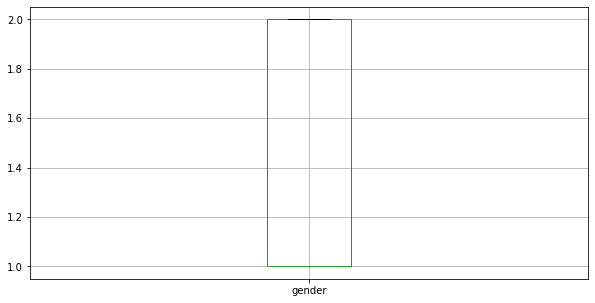

In [40]:
real_input.boxplot(column = feature, figsize = (10, 5))

In [41]:
'''
feature "gender" is well distributed. so leave it as it is.
'''

'\nfeature "gender" is well distributed. so leave it as it is.\n'

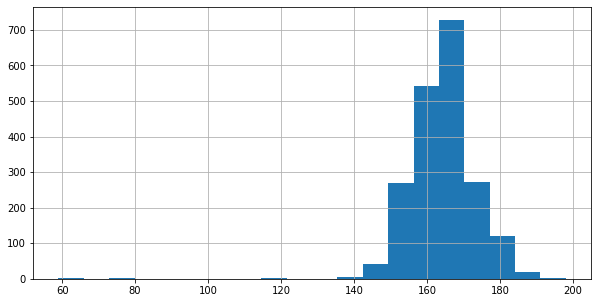

In [42]:
j += 1
feature = features[j]
real_input[feature].hist(figsize = (10, 5), bins = 20)

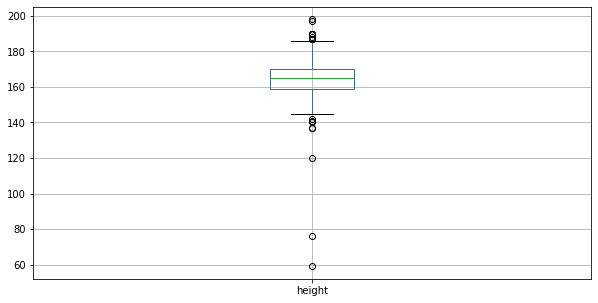

In [43]:
real_input.boxplot(column = feature, figsize = (10, 5))

In [44]:
'''
For feature "height",
outliers found in both histogram and boxplot
Set "height" < 148 = 148 and "height" > 180 = 180
'''

real_input[feature] = real_input[feature].mask(real_input[feature] < 148., other = 148.)
real_input[feature] = real_input[feature].mask(real_input[feature] > 180., other = 180.)

In [45]:
print("feature", feature, "details =")
real_input[feature].describe()

feature height details =


count    2002.000000
mean      164.648352
std         7.672339
min       148.000000
25%       159.000000
50%       165.000000
75%       170.000000
max       180.000000
Name: height, dtype: float64

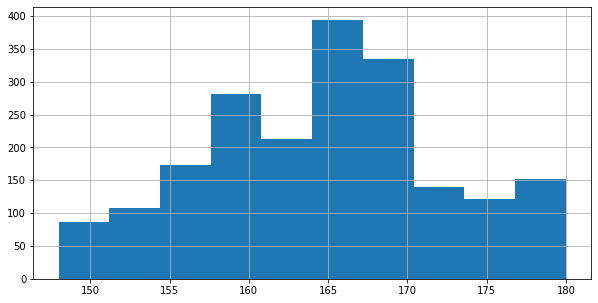

In [46]:
'''
Feature "height" is now well distributed
'''
real_input[feature].hist(figsize = (10, 5), bins = 10)

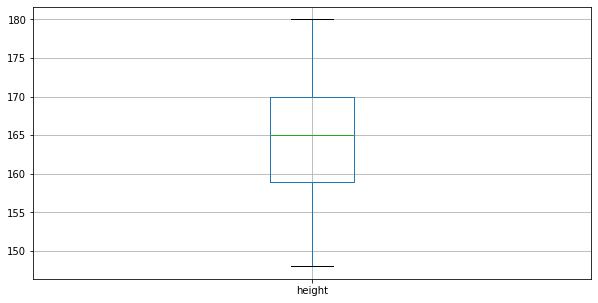

In [47]:
real_input.boxplot(column = feature, figsize = (10, 5))

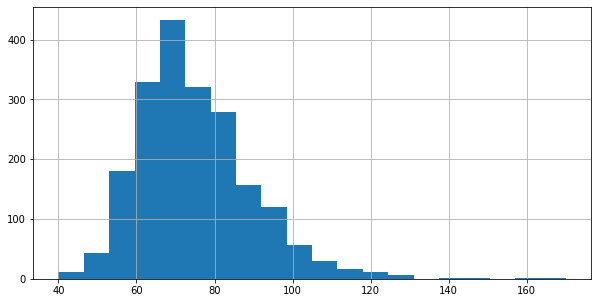

In [48]:
j += 1
feature = features[j]
real_input[feature].hist(figsize = (10, 5), bins = 20)

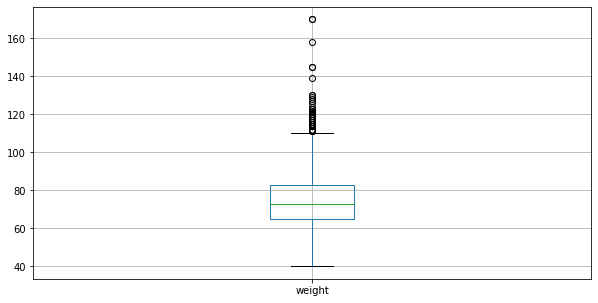

In [49]:
real_input.boxplot(column = feature, figsize = (10, 5))

In [50]:
'''
For feature "weight",
outliers found in both histogram and boxplot
Set "weight" < 55 = 55 and "weight" > 105 = 105
'''

real_input[feature] = real_input[feature].mask(real_input[feature] < 55., other = 55.)
real_input[feature] = real_input[feature].mask(real_input[feature] > 105., other = 105.)

In [51]:
print("feature", feature, "details =")
real_input[feature].describe()

feature weight details =


count    2002.000000
mean       74.590110
std        13.059136
min        55.000000
25%        65.000000
50%        73.000000
75%        83.000000
max       105.000000
Name: weight, dtype: float64

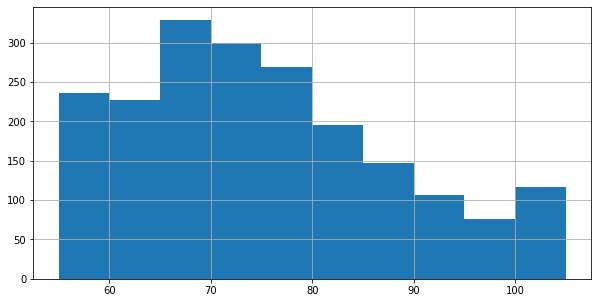

In [52]:
'''
Feature "weight" is now well distributed
'''
real_input[feature].hist(figsize = (10, 5), bins = 10)

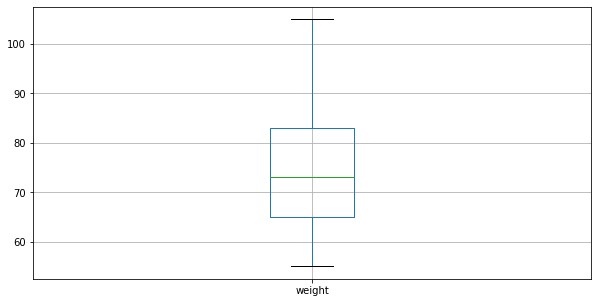

In [53]:
real_input.boxplot(column = feature, figsize = (10, 5))

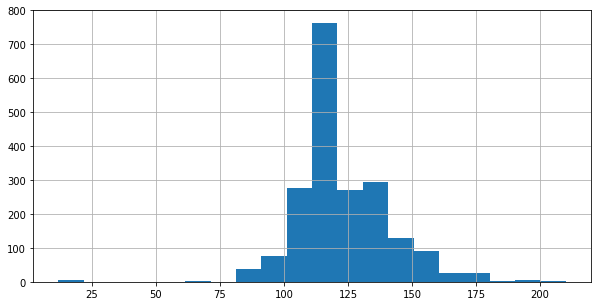

In [54]:
j += 1
feature = features[j]
real_input[feature].hist(figsize = (10, 5), bins = 20)

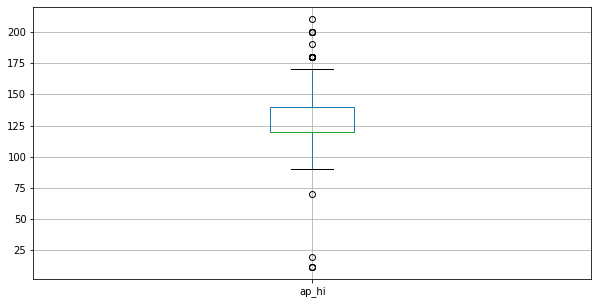

In [55]:
real_input.boxplot(column = feature, figsize = (10, 5))

In [56]:
'''
For feature "ap_hi",
outliers found in both histogram and boxplot
Set "ap_hi" < 100 = 100 and "ap_hi" > 170 = 170 
'''

real_input[feature] = real_input[feature].mask(real_input[feature] < 100., other = 100.)
real_input[feature] = real_input[feature].mask(real_input[feature] > 170., other = 170.)

In [57]:
print("feature", feature, "details =")
real_input[feature].describe()

feature ap_hi details =


count    2002.000000
mean      126.746254
std        16.224362
min       100.000000
25%       120.000000
50%       120.000000
75%       140.000000
max       170.000000
Name: ap_hi, dtype: float64

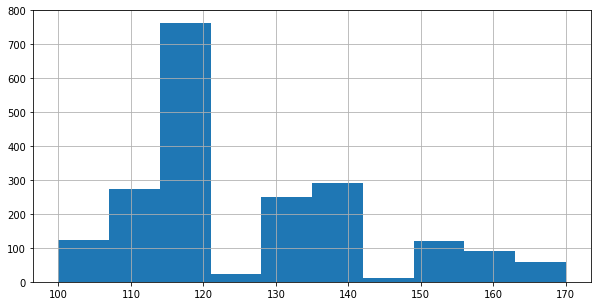

In [58]:
'''
Feature "ap_hi" is now well distributed
'''
real_input[feature].hist(figsize = (10, 5), bins = 10)

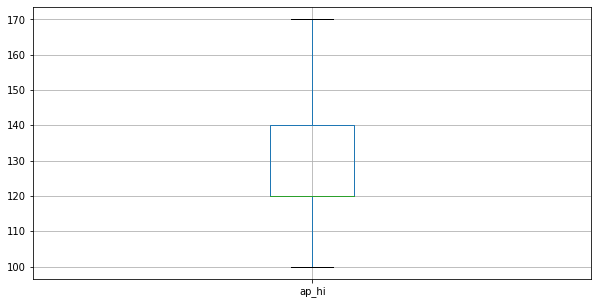

In [59]:
real_input.boxplot(column = feature, figsize = (10, 5))

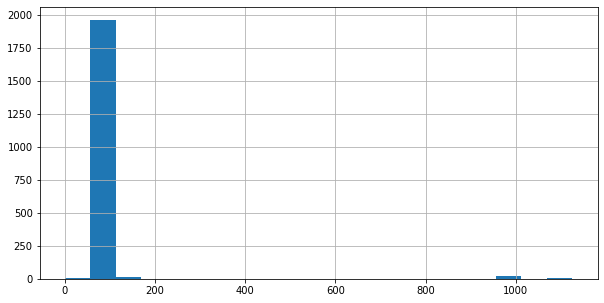

In [60]:
j += 1
feature = features[j]
real_input[feature].hist(figsize = (10, 5), bins = 20)

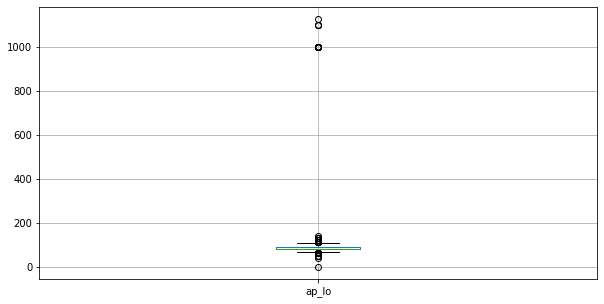

In [61]:
real_input.boxplot(column = feature, figsize = (10, 5))

In [62]:
'''
For feature "ap_lo",
outliers found in both histogram and boxplot
Set "ap_lo" < 40 = 40 and "ap_lo" > 200 = 200
'''

real_input[feature] = real_input[feature].mask(real_input[feature] < 65., other = 65.)
real_input[feature] = real_input[feature].mask(real_input[feature] > 105., other = 105.)

In [63]:
print("feature", feature, "details =")
real_input[feature].describe()

feature ap_lo details =


count    2002.000000
mean       81.760240
std         9.283446
min        65.000000
25%        80.000000
50%        80.000000
75%        90.000000
max       105.000000
Name: ap_lo, dtype: float64

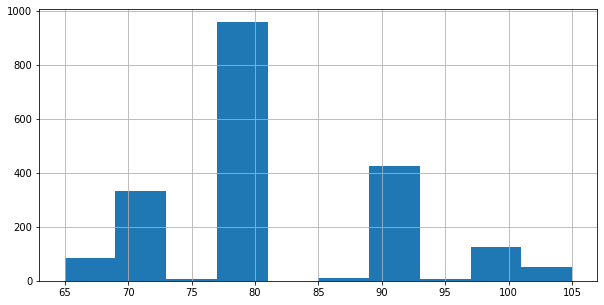

In [64]:
'''
Feature "ap_lo" is now well distributed
'''
real_input[feature].hist(figsize = (10, 5), bins = 10)

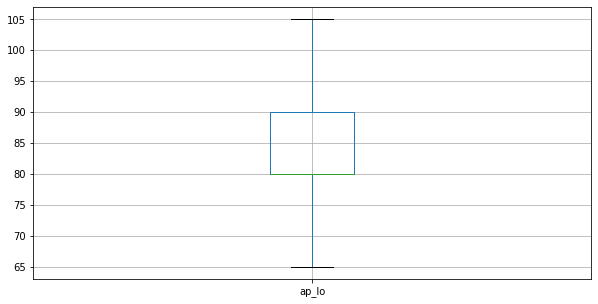

In [65]:
real_input.boxplot(column = feature, figsize = (10, 5))

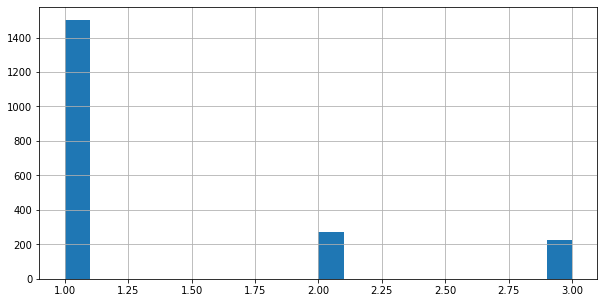

In [66]:
j += 1
feature = features[j]
real_input[feature].hist(figsize = (10, 5), bins = 20)

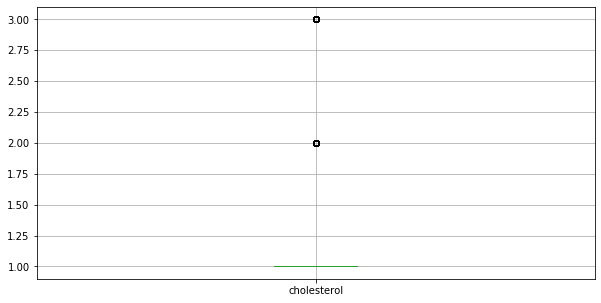

In [67]:
real_input.boxplot(column = feature, figsize = (10, 5))

In [68]:
'''
attribute "cholesterol" is well distributed. so leave it as it is.
'''

'\nattribute "cholesterol" is well distributed. so leave it as it is.\n'

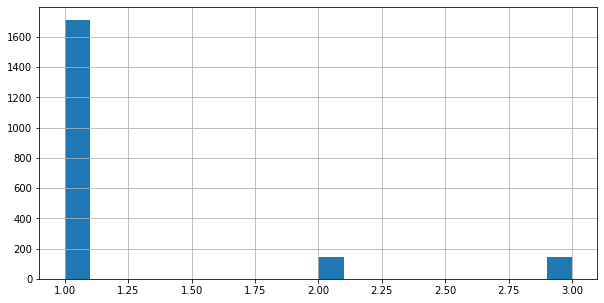

In [69]:
j += 1
feature = features[j]
real_input[feature].hist(figsize = (10, 5), bins = 20)

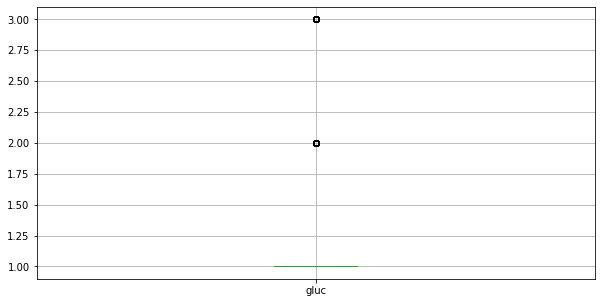

In [70]:
real_input.boxplot(column = feature, figsize = (10, 5))

In [71]:
'''
For feature "gluc",
outliers found in both histogram and boxplot
Set "gluc" > 4 = 4
'''

real_input[feature] = real_input[feature].mask(real_input[feature] > 2., other = 2.)

In [72]:
print("feature", feature, "details =")
real_input[feature].describe()

feature gluc details =


count    2002.000000
mean        1.144356
std         0.351538
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: gluc, dtype: float64

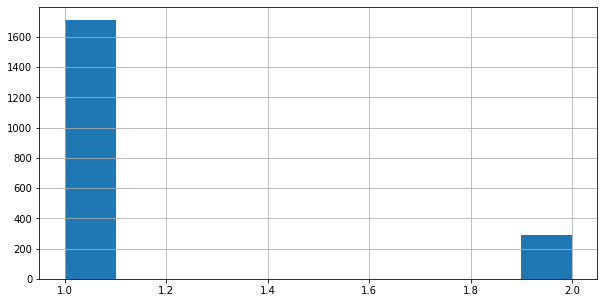

In [73]:
'''
Feature "gluc" is now well distributed
'''
real_input[feature].hist(figsize = (10, 5), bins = 10)

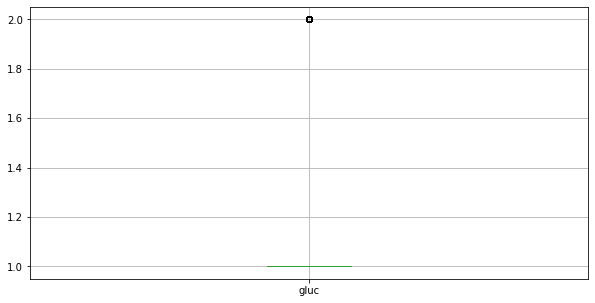

In [74]:
real_input.boxplot(column = feature, figsize = (10, 5))

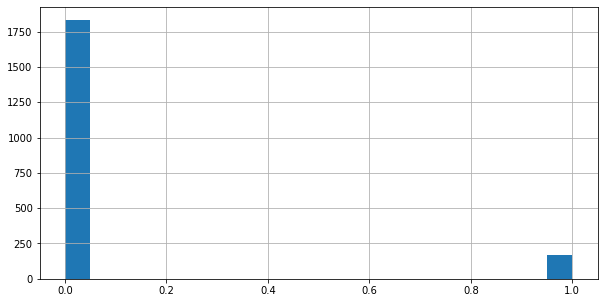

In [75]:
j += 1
feature = features[j]
real_input[feature].hist(figsize = (10, 5), bins = 20)

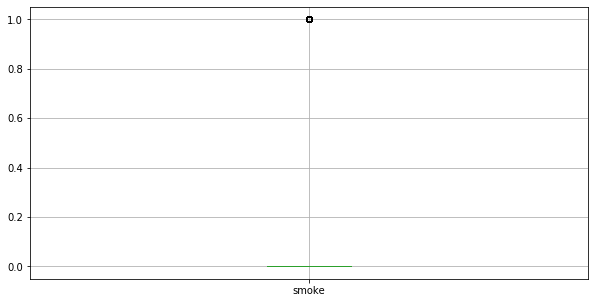

In [76]:
real_input.boxplot(column = feature, figsize = (10, 5))

In [77]:
'''
feature "smoke" is well distributed. so leave it as it is.
'''

'\nfeature "smoke" is well distributed. so leave it as it is.\n'

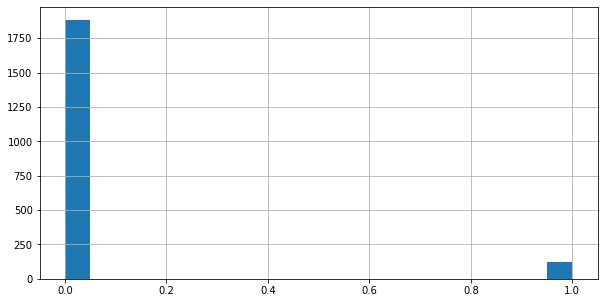

In [78]:
j += 1
feature = features[j]
real_input[feature].hist(figsize = (10, 5), bins = 20)

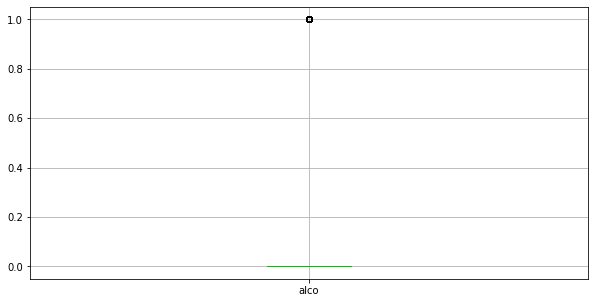

In [79]:
real_input.boxplot(column = feature, figsize = (10, 5))

In [80]:
'''
feature "alco" is well distributed. so leave it as it is.
'''

'\nfeature "alco" is well distributed. so leave it as it is.\n'

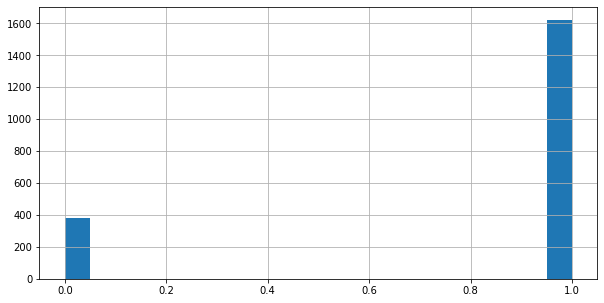

In [81]:
j += 1
feature = features[j]
real_input[feature].hist(figsize = (10, 5), bins = 20)

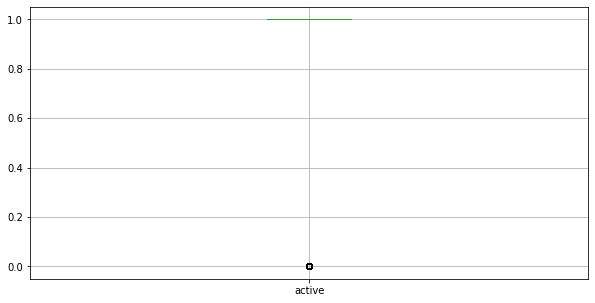

In [82]:
real_input.boxplot(column = feature, figsize = (10, 5))

In [83]:
'''
feature "active" is well distributed. so leave it as it is.
'''

'\nfeature "active" is well distributed. so leave it as it is.\n'

In [84]:
# data normalization 

In [85]:
'''    
There are a number of techniques to normalize data such as-
min-max normalization, feature clipping, log scaling, z-score etc.
more information available at -
https://developers.google.com/machine-learning/data-prep/transform/normalization
'''
# min-max equation -
# X = (X - Xmin) / (Xmax - Xmin)
#real_input = (real_input - real_input.min()) / (real_input.max() - real_input.min())
real_input = (real_input - real_input.min()) / (real_input.max() - real_input.min())
real_input

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
103,0.405166,1.0,1.00000,0.80,0.357143,0.375,0.0,1.0,1.0,0.0,1.0
112,0.245597,0.0,0.31250,0.46,0.142857,0.125,0.0,0.0,0.0,0.0,1.0
130,0.817056,1.0,0.65625,0.08,0.428571,0.375,0.0,0.0,0.0,0.0,0.0
147,0.975344,1.0,0.56250,0.28,0.428571,0.625,0.5,0.0,0.0,0.0,1.0
189,0.024015,1.0,1.00000,0.40,0.285714,0.375,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
69695,0.788558,0.0,0.62500,0.10,0.285714,0.375,0.0,0.0,0.0,0.0,1.0
69732,0.101718,0.0,0.09375,0.32,0.857143,0.875,0.0,0.0,0.0,0.0,1.0
69872,0.797951,0.0,0.12500,0.02,0.857143,1.000,0.0,0.0,0.0,0.0,1.0
69919,0.318070,0.0,0.34375,0.00,0.142857,0.125,0.5,1.0,0.0,0.0,1.0


In [86]:
# data correlation 
real_input.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
age,1.000000,-0.050347,-0.109544,0.010730,0.211523,0.156452,0.163849,0.048568,-0.052297,-0.037773,-0.015958
gender,-0.050347,1.000000,0.517658,0.183789,0.106121,0.101937,-0.004480,-0.014195,0.329894,0.161860,-0.042187
height,-0.109544,0.517658,1.000000,0.336576,0.028606,0.049713,-0.031233,-0.028975,0.222860,0.107093,-0.015880
weight,0.010730,0.183789,0.336576,1.000000,0.257364,0.260233,0.155033,0.130572,0.112084,0.059541,-0.019352
ap_hi,0.211523,0.106121,0.028606,0.257364,1.000000,0.748086,0.239528,0.112623,0.086165,0.071266,0.000831
ap_lo,0.156452,0.101937,0.049713,0.260233,0.748086,1.000000,0.218218,0.115814,0.093022,0.063626,0.014258
cholesterol,0.163849,-0.004480,-0.031233,0.155033,0.239528,0.218218,1.000000,0.383634,0.078339,0.027208,0.041696
gluc,0.048568,-0.014195,-0.028975,0.130572,0.112623,0.115814,0.383634,1.000000,0.023536,0.034993,0.024845
smoke,-0.052297,0.329894,0.222860,0.112084,0.086165,0.093022,0.078339,0.023536,1.000000,0.371992,0.027847
alco,-0.037773,0.161860,0.107093,0.059541,0.071266,0.063626,0.027208,0.034993,0.371992,1.000000,0.030099


([<matplotlib.axis.YTick at 0xe45a610>,
 <a list of 11 Text yticklabel objects>)

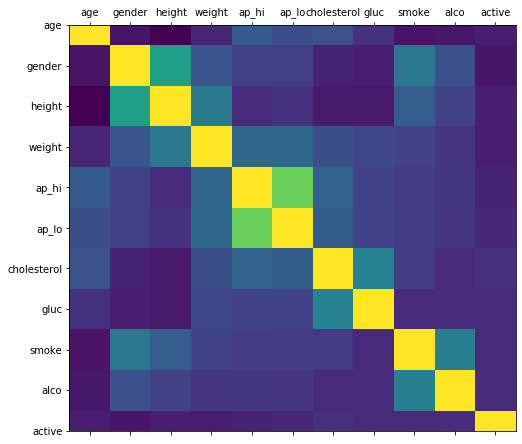

In [87]:
# graphical representation of data correlation
# data correlation means dependency of data among each others i.e.
# dependency of attributes among each other
'''
data correlation formula between two attributes (data columns) X and Y -

            Σ(X - Xmean) * Σ(Y - Ymean) 
corr = -------------------------------------
       sqrt(Σ(X - Xmean)^2 * Σ(Y - Ymean)^2)
       
'''
plt.matshow(real_input.corr())
plt.xticks(ticks = np.arange(real_input.columns.size), labels = real_input.columns)
plt.yticks(ticks = np.arange(real_input.columns.size), labels = real_input.columns)

In [88]:
# input, hidden, output neurons declaration
input_neurons  = real_input.columns.size
hidden_neurons = 7 # any number but (2/3) * (input_neurons+output_neurons) is better.
output_neurons = 1

In [89]:
# split real_input and real_output into train and test input, output taking
# traing data = 75% of dataset
# test data = 25% of dataset

# input
train_input  = real_input.sample(frac = .75).sort_index().copy()
train_output = real_output.loc[real_input.index.intersection(train_input.index)].copy()

# split output
test_input  = real_input.loc[real_input.index.difference(train_input.index)].copy()
test_output = real_output.loc[real_output.index.difference(train_output.index)].copy()

In [90]:
# converting real_input and real_output to numpy array for easy calculation

train_input  = np.array(train_input,  dtype = np.float64).T # transpose
train_output = np.array(train_output, dtype = np.float64).T 

test_input  = np.array(test_input,  dtype = np.float64).T
test_output = np.array(test_output, dtype = np.float64).T

In [91]:
# hidden_weights, output_weights,
# hidden_biases,  output_biases initialization
# Xavier initialization 
hidden_weights = np.sqrt(6 / (input_neurons + hidden_neurons)) * \
                 np.random.uniform(low=-1, high=1, size = (input_neurons, hidden_neurons))

hidden_biases  = np.random.random((hidden_neurons, 1))

output_weights = np.sqrt(6 / (hidden_neurons + output_neurons)) * \
                 np.random.uniform(low=-1, high=1, size = (hidden_neurons, output_neurons))

output_biases  = np.random.random((output_neurons, 1))

hidden_weights, hidden_biases, output_weights, output_biases

(array([[-0.1552353 , -0.07647269, -0.41548837,  0.5343748 , -0.00316502,
         -0.54477921, -0.42856874],
        [-0.30317581,  0.52405494, -0.3374043 ,  0.38786487,  0.3834264 ,
          0.12736108,  0.12864781],
        [ 0.0364016 ,  0.35752018,  0.35507402, -0.37134883, -0.51203285,
         -0.51033198, -0.34317988],
        [-0.54905704,  0.53087701, -0.12337117,  0.32056084,  0.35339698,
          0.47666733,  0.55352148],
        [-0.25229669,  0.07511744,  0.48446532, -0.42382918,  0.56170142,
          0.03588903,  0.55504767],
        [-0.23666074, -0.37622814,  0.2881943 , -0.35304203,  0.18847718,
         -0.51537709, -0.43624285],
        [-0.25541076,  0.22371081, -0.46373846,  0.23228818,  0.19518096,
          0.50983127, -0.57159624],
        [-0.22689731, -0.47727169,  0.22219819, -0.37642022, -0.0202249 ,
          0.48626552, -0.56960405],
        [-0.09927523, -0.19131248, -0.06152308,  0.50597733, -0.26917407,
         -0.21163326, -0.16196884],
        [ 

In [92]:
# sum of square errors (sse) which is a measure to calculate error and
# derivative of sse (necessary for gradient descent calculation in backpropagation)
net_hidden_output    = np.zeros((hidden_neurons, train_output.shape[0]),  dtype = np.float64)
hidden_output        = np.zeros((hidden_neurons, train_output.shape[0]),  dtype = np.float64)
net_predicted_output = np.zeros((output_neurons, train_output.shape[0]),  dtype = np.float64)
predicted_output     = np.zeros((output_neurons, train_output.shape[0]),  dtype = np.float64)
sse  = np.zeros((output_neurons, train_output.shape[0]),  dtype = np.float64)
dsse = np.zeros((output_neurons, train_output.shape[0]),  dtype = np.float64)

In [93]:
# necessary functions declarations
# activation function declaration
def tanh(x):
    return np.tanh(x)

def dtanh(x): # derivative of tanh
    return (4 * np.exp(2*x)) / (np.exp(2*x) + 1)**2

# feed-forward calculation
def feed_forward():
    global hidden_weights, hidden_biases,\
           output_weights, output_biases,\
           net_hidden_output, hidden_output,\
           net_predicted_output, predicted_output,\
           min_value_not_matched,\
           sse, dsse

    net_hidden_output    = np.dot(hidden_weights.T, train_input)   + hidden_biases    
    hidden_output        = tanh(net_hidden_output)    
    net_predicted_output = np.dot(output_weights.T, hidden_output) + output_biases   
    predicted_output     = tanh(net_predicted_output)
    
    # values not matched after prediction calculation
    value_not_matched = np.sum(np.abs(train_output - np.where(predicted_output >= 0.5, 1, 0)))
    min_value_not_matched = min(min_value_not_matched, value_not_matched)
    
    # sse, derivative of sse
    sse  = 0.5 * (predicted_output - train_output)**2
    dsse = (predicted_output - train_output)
    return 0

# backpropagation calculation
def back_propagation():
    global hidden_weights, hidden_biases,\
           output_weights, output_biases,\
           net_hidden_output, hidden_output,\
           net_predicted_output, predicted_output,\
           sse, dsse, dataset_len
    
    # gradient descent calculation
    grad_output_weights = np.zeros((hidden_neurons, output_neurons))
    for i in range(hidden_neurons):
        for j in range(output_neurons):
            grad_output_weights[i, j] += np.sum(hidden_output[i] *\
                                               dsse[j] * dtanh(net_predicted_output[j]))
    grad_output_weights /= dataset_len
            
    grad_output_biases = np.zeros((output_neurons, 1))
    for i in range(output_neurons):
        grad_output_biases[i, 0] += np.sum(dsse[i] * dtanh(net_predicted_output[i]))
    grad_output_biases /= dataset_len
    
    grad_hidden_weights = np.zeros((input_neurons, hidden_neurons))
    for i in range(input_neurons):
        for j in range(hidden_neurons):
            for k in range(output_neurons):
                grad_hidden_weights[i, j] += np.sum(train_input[i] \
                                            * dtanh(net_hidden_output[j]) \
                                            * output_weights[j, k] \
                                            * dtanh(net_predicted_output[k]) \
                                            * dsse[k])
    grad_hidden_weights /= dataset_len
            
    grad_hidden_biases = np.zeros((hidden_neurons, 1))
    for i in range(hidden_neurons):
        for j in range(output_neurons):
            grad_hidden_biases[i, 0] += np.sum(dtanh(net_hidden_output[i]) *\
                                               output_weights[i, j]\
                                               * dtanh(net_predicted_output[j]) * dsse[j])
    grad_hidden_biases /= dataset_len
            
    n = .01 # learning rate
    
    # update weights and biases
    output_weights -= n * grad_output_weights
    output_biases  -= n * grad_output_biases
    hidden_weights -= n * grad_hidden_weights
    hidden_biases  -= n * grad_hidden_biases
    return 0

In [94]:
epoches = 10000
Iterations = []
Cost = []
min_value_not_matched = dataset_len # for highest accuracy calculation

# Time taken for activation function tanh(x)
start_time = time.time()

# Iterative ANN
for i in range(epoches):
    feed_forward()
    back_propagation()
    Iterations.append(i)
    Cost.append(np.sum(sse))
    
# stop time
end_time = time.time()

# time taken (seconds) for activation function tanh
end_time - start_time

464.74227142333984

In [95]:
# sse, updated weights, biases
print("sse = ", np.sum(sse))
print("updated weights and biases = ")
hidden_weights, hidden_biases, output_weights, output_biases

sse =  161.57435506223464
updated weights and biases = 


(array([[-0.24945065, -0.17460628, -0.48353653,  0.46317761,  0.02438683,
         -0.53998194, -0.43802313],
        [-0.38461368,  0.44875452, -0.39682587,  0.33202093,  0.40318187,
          0.13148519,  0.12093477],
        [-0.05878252,  0.25854452,  0.28890704, -0.44686915, -0.48289254,
         -0.50531666, -0.35276919],
        [-0.62050085,  0.45848146, -0.17405106,  0.26717481,  0.37317935,
          0.48016254,  0.546551  ],
        [-0.33025591, -0.00311709,  0.43411262, -0.48771675,  0.58145138,
          0.04000872,  0.54764719],
        [-0.30625533, -0.44716317,  0.24300149, -0.40939826,  0.2056172 ,
         -0.51205394, -0.44317172],
        [-0.27992366,  0.19839242, -0.48537481,  0.21641971,  0.19988262,
          0.51064302, -0.5739099 ],
        [-0.21731201, -0.47316408,  0.22817772, -0.36755386, -0.02498774,
          0.48553375, -0.56926244],
        [-0.12187162, -0.21370701, -0.07651078,  0.49292522, -0.26330198,
         -0.21034832, -0.1641202 ],
        [ 

In [96]:
# predicted output, predicted_output after thresholded, real output
print("predicted output = \n", *predicted_output)
predicted_output = np.where(predicted_output >= 0.5, 1, 0)
print("predicted output after thresholded = \n",\
      *predicted_output)
print("train output = \n", *train_output)

predicted output = 
 [0.77553818 0.22023749 0.42504841 ... 0.25461698 0.40579256 0.77922767]
predicted output after thresholded = 
 [1 0 0 ... 0 0 1]
train output = 
 [0. 0. 1. ... 0. 1. 1.]


In [97]:
# confusion matrix for train data
# rows represent expected class and columns represent predicted class
# more at https://machinelearningmastery.com/confusion-matrix-machine-learning/
'''  
         |     event      |    no-event
------------------------------------------        
event    | true  positive | false positive
no-event | false negative | true  negative
'''

columns = ["no-cardio", "cardio"]
index   = ["no-cardio", "cardio"]
confusion_matrix = pd.DataFrame(columns = columns, index = index)

confusion_matrix.loc["no-cardio", "no-cardio"] = \
            predicted_output[(train_output == 0) & (predicted_output == 0)].size

confusion_matrix.loc["cardio", "cardio"] = \
            predicted_output[(train_output == 1) & (predicted_output == 1)].size

confusion_matrix.loc["cardio", "no-cardio"] = \
            predicted_output[(train_output == 0) & (predicted_output == 1)].size

confusion_matrix.loc["no-cardio", "cardio"] = \
            predicted_output[(train_output == 1) & (predicted_output == 0)].size

confusion_matrix

,no-cardio,cardio
no-cardio,517,228
cardio,241,516


In [106]:
# accuracy calculation
print("Minimum Values not matched = ", min_value_not_matched)
accuracy = (train_output.size - min_value_not_matched) / train_output.size * 100
print("Highest train data accuracy =", accuracy, "%")

Minimum Values not matched =  153.0
Highest train data accuracy = 89.81358189081226 %


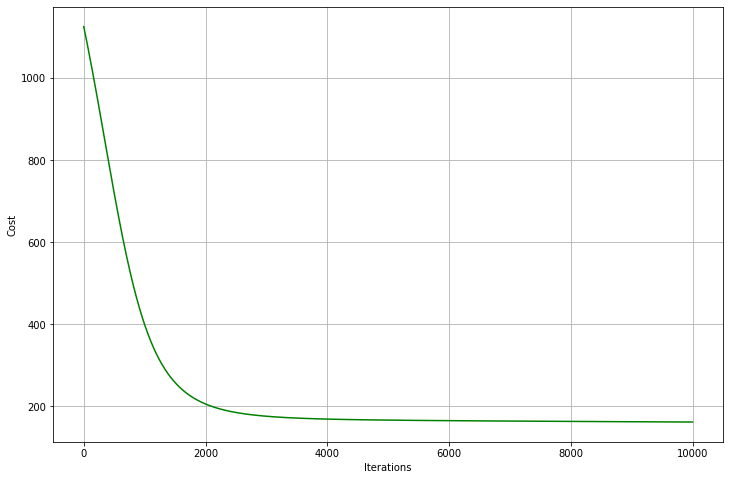

In [99]:
# graph plot
plt.plot(Iterations, Cost, 'g-')
plt.grid(True)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.show()

In [100]:
# test data calcluation

net_hidden_output    = np.zeros((hidden_neurons, test_output.shape[0]),  dtype = np.float64)
hidden_output        = np.zeros((hidden_neurons, test_output.shape[0]),  dtype = np.float64)
net_predicted_output = np.zeros((output_neurons, test_output.shape[0]),  dtype = np.float64)
predicted_output     = np.zeros((output_neurons, test_output.shape[0]),  dtype = np.float64)
sse  = np.zeros((output_neurons, test_output.shape[0]),  dtype = np.float64)
dsse = np.zeros((output_neurons, test_output.shape[0]),  dtype = np.float64)

net_hidden_output    = np.dot(hidden_weights.T, test_input)    + hidden_biases    
hidden_output        = tanh(net_hidden_output)    
net_predicted_output = np.dot(output_weights.T, hidden_output) + output_biases   
predicted_output     = tanh(net_predicted_output)

# values not matched after prediction calculation
value_not_matched = np.sum(np.abs(test_output - np.where(predicted_output >= 0.5, 1, 0)))
min_value_not_matched = min(min_value_not_matched, value_not_matched)

# sse, derivative of sse
sse  = 0.5 * (predicted_output - test_output)**2
dsse = (predicted_output - test_output)

In [101]:
# sse, updated weights, biases
print("sse = ", np.sum(sse))

sse =  50.60236663480977


In [102]:
predicted_output = np.where(predicted_output >= 0.5, 1, 0)

In [103]:
# confusion matrix for test data
# rows represent expected class and columns represent predicted class
# more at https://machinelearningmastery.com/confusion-matrix-machine-learning/
'''  
         |     event      |    no-event
------------------------------------------        
event    | true  positive | false positive
no-event | false negative | true  negative
'''

columns = ["no-cardio", "cardio"]
index   = ["no-cardio", "cardio"]
confusion_matrix = pd.DataFrame(columns = columns, index = index)

confusion_matrix.loc["no-cardio", "no-cardio"] = \
            predicted_output[(test_output == 0) & (predicted_output == 0)].size

confusion_matrix.loc["cardio", "cardio"] = \
            predicted_output[(test_output == 1) & (predicted_output == 1)].size

confusion_matrix.loc["cardio", "no-cardio"] = \
            predicted_output[(test_output == 0) & (predicted_output == 1)].size

confusion_matrix.loc["no-cardio", "cardio"] = \
            predicted_output[(test_output == 1) & (predicted_output == 0)].size

confusion_matrix

,no-cardio,cardio
no-cardio,164,76
cardio,77,183


In [104]:
# classification match, mismatch, accuracy etc calculation from confusion matrix

# no-cardio classified as no-cardio
no_cardio_matched = confusion_matrix.loc["no-cardio", "no-cardio"]

# cardio classified as cardio
cardio_matched = confusion_matrix.loc["cardio", "cardio"]

# no-cardio classified as cardio
no_cardio_mismatched = confusion_matrix.loc["no-cardio", "cardio"]

# cardio classified as no-cardio
cardio_mismatched = confusion_matrix.loc["cardio", "no-cardio"]

total_matched    = no_cardio_matched    + cardio_matched
total_mismatched = no_cardio_mismatched + cardio_mismatched

accuracy = total_matched / test_output.size * 100.

accuracy

69.39999999999999

In [105]:
train_input.shape

(11, 1502)